# Reparametrization trick in VAE

* This notebook is copy from [here](https://nbviewer.jupyter.org/github/gokererdogan/Notebooks/blob/master/Reparameterization%20Trick.ipynb).
* Reading good reference page [here](https://stats.stackexchange.com/questions/199605/how-does-the-reparameterization-trick-for-vaes-work-and-why-is-it-important?fbclid=IwAR2cKR7i9Z6F-f0mpGIg1NSJu9c7QvLO4gdFJUZCPNGgJ5M6a1QoGdLPZ78)

Here we will understand the reparameterization trick used by Kingma and Welling (2014) to train their variational autoencoder.

Assume we have a normal distribution $q$ that is parameterized by $\theta$, specifically $q_{\theta}(x) = \mathcal{N}(θ,1)$. We want to solve the below problem

$$min_{\theta} \mathbb{E}_{q}[x^{2}]$$

This is of course a rather silly problem and the optimal $\theta$ is obvious. We want to understand how the reparameterization trick helps in calculating the gradient of this objective $\mathbb{E}_{q}[x^{2}]$.

One way to calculate $\nabla_{\theta} \mathbb{E}_{q}[x^{2}]$ is as follows

$$\nabla_{\theta} \mathbb{E}_{q}[x^{2}]
= \nabla_{\theta} \int q_{\theta}(x) x^{2} \mathrm{d}x
= \int x^{2} \nabla_{\theta} q_{\theta}(x) \frac{q_{\theta}(x)}{q_{\theta}(x)} \mathrm{d}x
= \int q_{\theta}(x) \nabla_{\theta} \log q_{\theta}(x) x^{2} \mathrm{d}x
= \mathbb{E}_{q}[x^{2} \nabla_{\theta} \log q_{\theta}(x)]$$

For our example where $q_{\theta}(x) = \mathcal{N}(\theta,1)$, this method gives

$$\nabla_{\theta} \mathbb{E}_{q}[x^{2}] = \mathbb{E}_{q}[x^{2}(x−θ)]$$

Reparameterization trick is a way to rewrite the expectation so that the distribution with respect to which we take the expectation is independent of parameter $\theta$. To achieve this, we need to make the stochastic element in $q$ independent of $\theta$. Hence, we write $x$ as
$$x = \theta + \epsilon,  \epsilon \sim \mathcal{N}(\theta, 1)$$

Then, we can write
$$\mathbb{E}_{q}[x^{2}] = \mathbb{E}_{p}[(\theta + \epsilon)^{2}]$$
where $p$ is the distribution of $\epsilon$, i.e., $\mathcal{N}(0,1)$. Now we can write the derivative of $\mathbb{E}_{q}[x^{2}]$ as follows
$$\nabla_{\theta} \mathbb{E}_{q}[x^{2}]
= \nabla_{\theta} \mathbb{E}_{p}[(\theta + \epsilon)^{2}]
= \mathbb{E}_{p}[2(\theta + \epsilon)]$$

Now let us compare the variances of the two methods; we are hoping to see that the first method has high variance while reparameterization trick decreases the variance substantially.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import time
import glob

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
N = 1000
theta = 2.0
eps = np.random.randn(N)
x = theta + eps

grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size

print("grad1: {}".format(grad1(x)))
print("grad2: {}".format(grad2(eps)))

grad1: 4.026824025589159
grad2: 3.9341508758563757


## Let us plot the variance for different sample sizes.

In [4]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)
    
print(means1)
print(means2)
print(vars1)
print(vars2)

[3.92514885 3.98900799 3.99864897 3.99119196 3.99841658]
[4.00815322 3.9855625  4.0062116  3.99634223 3.99940004]
[6.48277138e+00 9.23219505e-01 7.48278915e-02 7.10427990e-03
 8.93286412e-04]
[3.73226557e-01 3.64194584e-02 4.48596983e-03 4.55418337e-04
 3.79240903e-05]


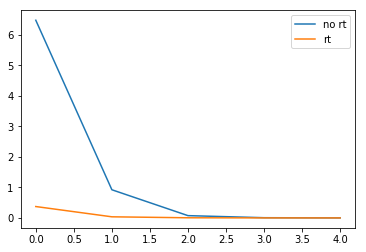

In [5]:
plt.plot(vars1)
plt.plot(vars2)
plt.legend(['no rt', 'rt'])

Variance of the estimates using reparameterization trick is one order of magnitude smaller than the estimates from the first method!